## SME0828 - Introdução à Ciência de Dados
## Questionário 2

### Lucas Corlete Alves de Melo  13676461

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"
# Read the table from the URL into a dataframe
df = pd.read_html(url)[0]

print(df.shape)
df.head(10)

(2461, 24)


,Unnamed: 0,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,NaN,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,NaN,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,NaN,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,NaN,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,NaN,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
5,NaN,Afghanistan,Asia,2010,Developing,58.8,279,74,0.01,79.679367,...,66.0,9.20,66,0.1,553.328940,2883167,18.4,18.4,0.448,9.2
6,NaN,Afghanistan,Asia,2009,Developing,58.6,281,77,0.01,56.762217,...,63.0,9.42,63,0.1,445.893298,284331,18.6,18.7,0.434,8.9
7,NaN,Afghanistan,Asia,2008,Developing,58.1,287,80,0.03,25.873925,...,64.0,8.33,64,0.1,373.361116,2729431,18.8,18.9,0.433,8.7
8,NaN,Afghanistan,Asia,2007,Developing,57.5,295,82,0.02,10.910156,...,63.0,6.73,63,0.1,369.835796,26616792,19.0,19.1,0.415,8.4
9,NaN,Afghanistan,Asia,2006,Developing,57.3,295,84,0.03,17.171518,...,58.0,7.43,58,0.1,272.563770,2589345,19.2,19.3,0.405,8.1


1. Construa um gráfico de setores (pizza) para a variável Status. Qual a porcentagem de
países desenvolvidos?

In [3]:
print(df['Status'])
print('\n', df['Status'].unique())

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2456    Developing
2457    Developing
2458    Developing
2459    Developing
2460    Developing
Name: Status, Length: 2461, dtype: object

 ['Developing' 'Developed']


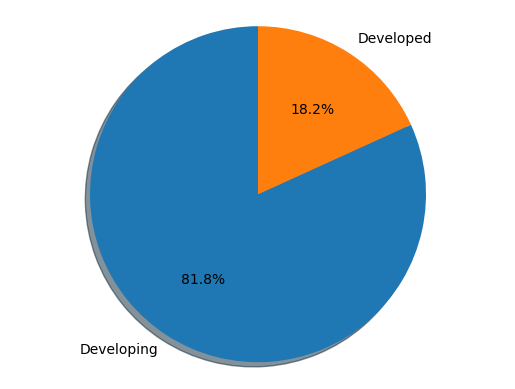

In [4]:
# Counting each frequency of Status categorics
status_counts = df['Status'].value_counts()

# Pie plot
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

2. Considerando a base anterior, construa um histograma para a variável Life_expectancy. Qual a média e variância desse atributo?

In [5]:
print(df['Life_expectancy'])
# print('\n', df['Life_expectancy'].unique())

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2456    44.3
2457    44.5
2458    44.8
2459    45.3
2460    46.0
Name: Life_expectancy, Length: 2461, dtype: float64


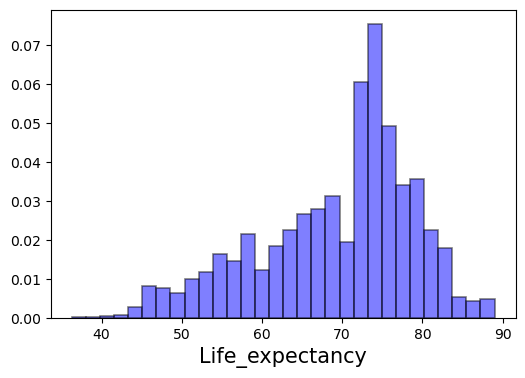


Média = 69.46456724908573
Variância = 92.91774400980518


In [6]:
life_expectancy = df['Life_expectancy']

fig= plt.figure(figsize=(6,4))

num_bins = 30
n, bins, patches = plt.hist(life_expectancy, num_bins, facecolor='blue', alpha=0.5, density=True, edgecolor='black', linewidth=1.2)
plt.xlabel("Life_expectancy", fontsize = 15)
# plt.ylabel("f(x)", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

print()

mean = life_expectancy.mean()
var = life_expectancy.var()

# Here the data are not normalized
print('Média =', mean)
print('Variância =', var)

3. Mostre a série temporal da variável Life_expectancy para os países: Ireland, Finland, Netherlands, Zambia, Angola. Os países com maior e menor expectativas de vida em 2014 são:

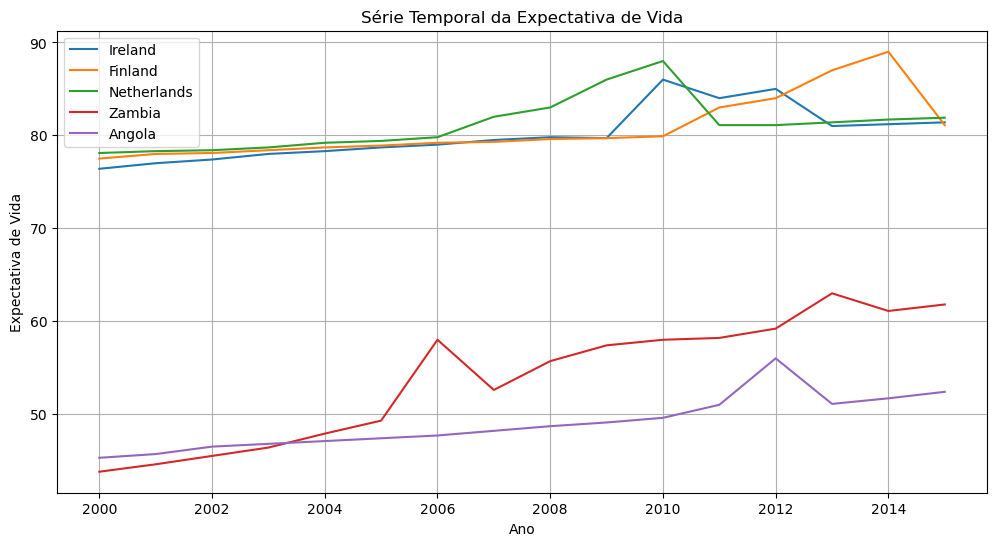

In [7]:
import matplotlib.pyplot as plt

# Selecting just countries that suits
paises = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']
df_paises = df[df['Country'].isin(paises)]

# Line graphic
plt.figure(figsize=(12, 6))
for pais in paises:
    plt.plot(df_paises[df_paises['Country'] == pais]['Year'], 
             df_paises[df_paises['Country'] == pais]['Life_expectancy'], 
             label=pais)

plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida')
plt.title('Série Temporal da Expectativa de Vida')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 2014 Filter
df_2014 = df[df['Year'] == 2014]

# Find the country with highier life expectancy in 2014
pais_maior_exp = df_2014.loc[df_2014['Life_expectancy'].idxmax(), 'Country']
maior_exp = df_2014['Life_expectancy'].max()

# Find the country with minor life expectancy in 2014
pais_menor_exp = df_2014.loc[df_2014['Life_expectancy'].idxmin(), 'Country']
menor_exp = df_2014['Life_expectancy'].min()

print()
print(f"O país com MAIOR expectativa de vida em 2014 foi {pais_maior_exp} com {maior_exp} anos.")
print(f"O país com MENOR expectativa de vida em 2014 foi {pais_menor_exp} com {menor_exp} anos.")


O país com MAIOR expectativa de vida em 2014 foi Belgium com 89.0 anos.
O país com MENOR expectativa de vida em 2014 foi Sierra Leone com 48.1 anos.


4. Faça um boxplot para a variável 'Schooling'. Considere os países: 'Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola'. Em termos da mediana, qual deles apresenta maior nível de escolaridade?

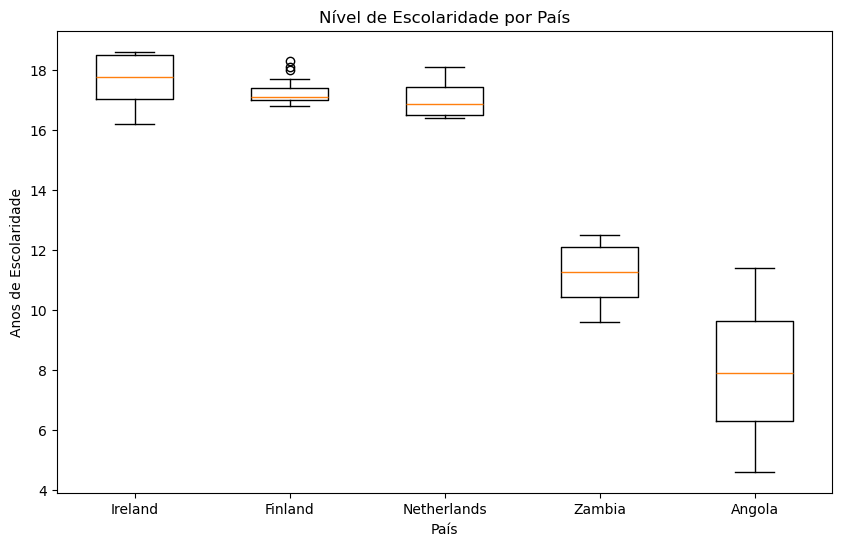

In [9]:
paises = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']
df_paises = df[df['Country'].isin(paises)]

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df_paises[df_paises['Country'] == pais]['Schooling'] for pais in paises])
plt.title('Nível de Escolaridade por País')
plt.xticks(range(1, len(paises) + 1), paises)
plt.xlabel('País')
plt.ylabel('Anos de Escolaridade')
plt.show()

5. Construa a matriz de correlação. Quais as variáveis menos correlacionadas?

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.worldometers.info/world-population/population-by-country/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the population data
table = soup.find('table', {'id': 'example2'})

# Convert the table to a Pandas DataFrame
df = pd.read_html(str(table))[0]

# Print the DataFrame
df.head(10)

/tmp/ipykernel_5421/1621415957.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1450935791,0.89 %,12866195,488,2973190,-630830,2.0,28,37 %,17.78 %
1,2,China,1419321278,-0.23 %,-3263655,151,9388211,-318992,1.0,40,66 %,17.39 %
2,3,United States,345426571,0.57 %,1949236,38,9147420,1286132,1.6,38,82 %,4.23 %
3,4,Indonesia,283487931,0.82 %,2297864,156,1811570,-38469,2.1,30,59 %,3.47 %
4,5,Pakistan,251269164,1.52 %,3764669,326,770880,-1401173,3.5,20,34 %,3.08 %
5,6,Nigeria,232679478,2.10 %,4796533,255,910770,-35202,4.4,18,54 %,2.85 %
6,7,Brazil,211998573,0.41 %,857844,25,8358140,-225510,1.6,34,91 %,2.60 %
7,8,Bangladesh,173562364,1.22 %,2095374,1333,130170,-473362,2.1,26,42 %,2.13 %
8,9,Russia,144820423,-0.43 %,-620077,9,16376870,-178042,1.5,40,75 %,1.77 %
9,10,Ethiopia,132059767,2.62 %,3368075,132,1000000,30069,3.9,19,22 %,1.62 %


In [11]:
print(df.shape)

(234, 12)


In [12]:
df_numeric = df.select_dtypes(include='number').drop(df.columns[0], axis=1) #Exclude non numerics values and index colunm

corr = df_numeric.corr()
corr

,Population (2024),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
Population (2024),1.000000,0.523137,-0.025541,0.449786,-0.237466,-0.034340,-0.015963
Net Change,0.523137,1.000000,-0.029962,0.097684,-0.224971,0.259889,-0.273917
Density (P/Km²),-0.025541,-0.029962,1.000000,-0.058298,-0.011282,-0.123338,0.184173
Land Area (Km²),0.449786,0.097684,-0.058298,1.000000,0.081904,-0.021409,0.014046
Migrants (net),-0.237466,-0.224971,-0.011282,0.081904,1.000000,-0.121995,0.152957
Fert. Rate,-0.034340,0.259889,-0.123338,-0.021409,-0.121995,1.000000,-0.849637
Med. Age,-0.015963,-0.273917,0.184173,0.014046,0.152957,-0.849637,1.000000


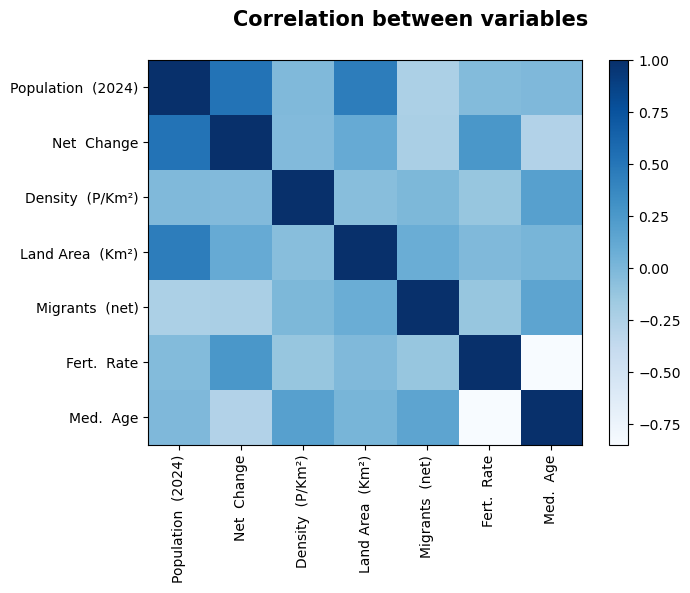

In [13]:
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

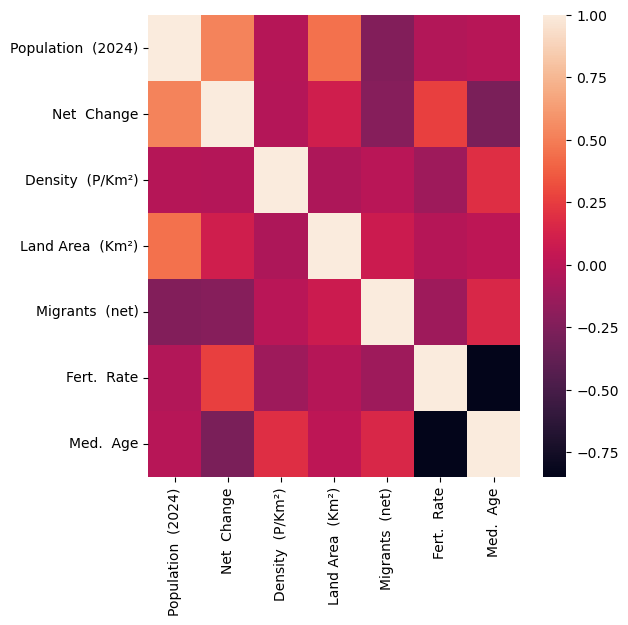

In [14]:
#Just showing heatmap to another vizualization

import seaborn as sns
plt.figure(figsize= (6, 6))
sns.heatmap(corr)
plt.show(sns)